Outcome Visualization

In [1]:
suf = "1205_074135"
img_title = "HAM10000"
n_classes = 7

In [2]:
import numpy as np
import os
data_root = "C:/Users/20878/221Project/HAM10K/tmp/HAM10000"
# Load the .npy file
def bdnm(name):
    return name + suf + ".npy"

dict_batch = np.load(os.path.join(data_root, suf, bdnm("HAM10000_dict_batch_")), allow_pickle=True).reshape(1)[0]
dict_imgSize = np.load(os.path.join(data_root, suf, bdnm("HAM10000_dict_imgSize_")), allow_pickle=True).reshape(1)[0]

train_loss_list = np.load(os.path.join(data_root, suf, bdnm("HAM10000_train_loss_"))) 
train_acc_list = np.load(os.path.join(data_root, suf, bdnm("HAM10000_train_acc_")))
test_loss_list = np.load(os.path.join(data_root, suf, bdnm("HAM10000_test_loss_")))
test_acc_list = np.load(os.path.join(data_root, suf, bdnm("HAM10000_test_acc_")))
test_auc_list = np.load(os.path.join(data_root, suf, bdnm("HAM10000_test_auc_")))
val_loss_list = np.load(os.path.join(data_root, suf, bdnm("HAM10000_val_loss_")))
val_acc_list = np.load(os.path.join(data_root, suf, bdnm("HAM10000_val_acc_")))
                

In [3]:
import seaborn as sns

from utils import ImageShow,draw_size_acc,one_hot
from utils import confusion_matrix,metrics_scores,pff

In [4]:
show = ImageShow(train_loss_list = train_loss_list,
                 train_acc_list = train_acc_list,
                test_loss_list = test_loss_list,
                test_acc_list = test_acc_list,
                test_auc_list = test_auc_list,
                val_loss_list = val_loss_list,
                val_acc_list = val_acc_list,
                )

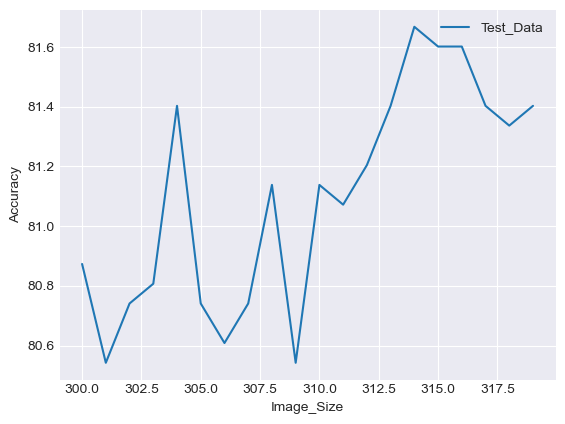

In [5]:
draw_size_acc(dict_imgSize,custom_path='./tmp',img_title=img_title,suf=suf)

In [6]:
import torch
test_evl_result = torch.load(os.path.join(data_root, suf, "best_test_evl_result.pth"))
val_evl_result = torch.load(os.path.join(data_root, suf, "best_val_evl_result.pth")) 
cla_dict = {0: 'akiec', 1: 'bcc', 2: 'bkl', 3: 'df', 4: 'mel', 5: 'nv', 6: 'vasc'}
metrics_scores(test_evl_result,n_classes,cla_dict)

+--------+-----------+--------+-------+----------+
|  Type  | Precision | Recall |   F1  | Accuracy |
+--------+-----------+--------+-------+----------+
| akiec  |   0.6452  | 0.465  | 0.541 |          |
|  bcc   |    0.85   | 0.731  | 0.786 |          |
|  bkl   |   0.7389  | 0.691  | 0.714 |          |
|   df   |   0.8571  | 0.409  | 0.554 |          |
|  mel   |   0.6573  |  0.55  | 0.599 |          |
|   nv   |   0.8542  | 0.955  | 0.902 |          |
|  vasc  |   0.9444  | 0.486  | 0.642 |          |
| Total: |           |        |       |  0.8167  |
+--------+-----------+--------+-------+----------+


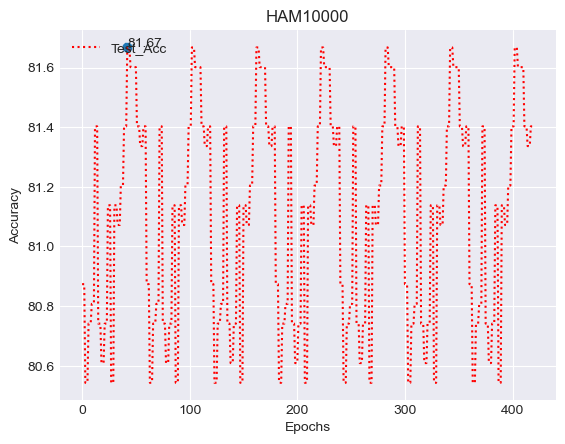

In [7]:
show.test(write=True,custom_path='./tmp',img_title=img_title,suf=suf)

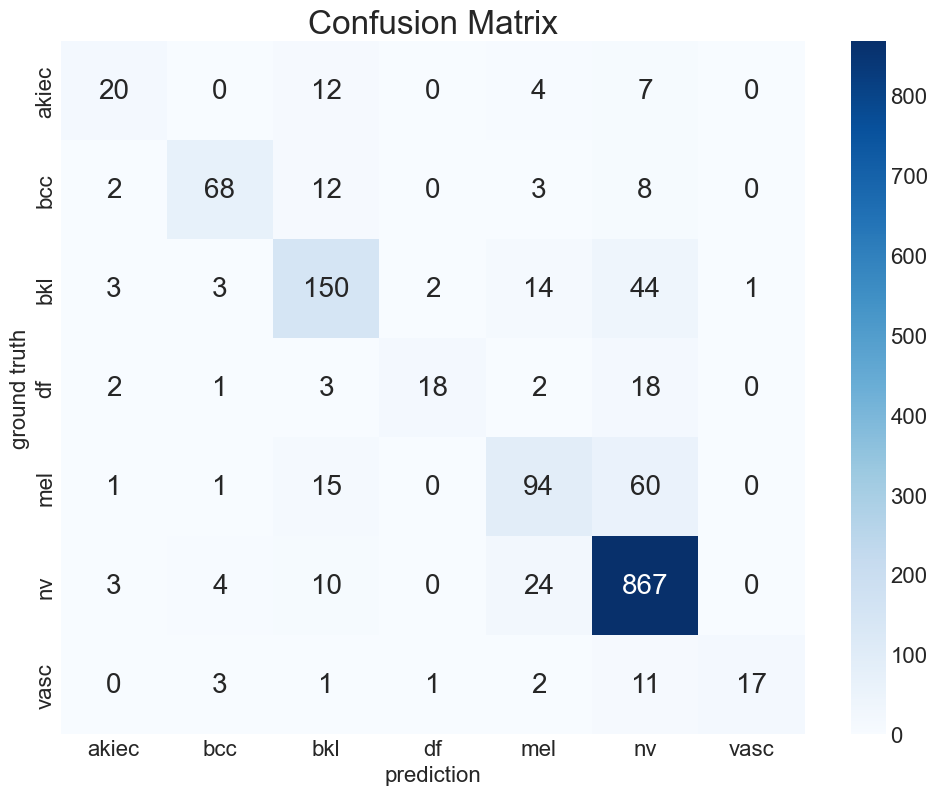

In [8]:
confusion_matrix(test_evl_result,n_classes,cla_dict,kn="test",img_title=img_title,suf=suf)

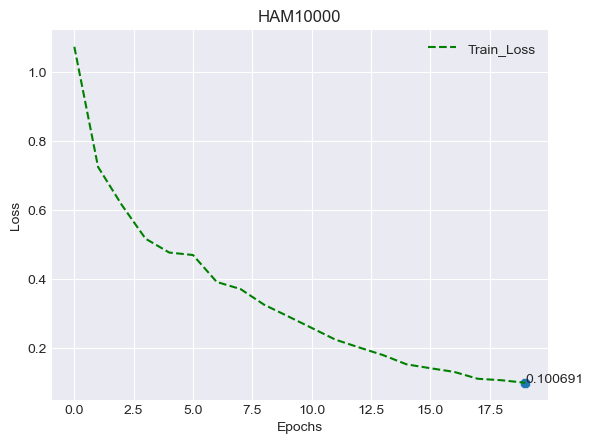

In [9]:
show.train(write=True,custom_path='./tmp',img_title=img_title,suf=suf)

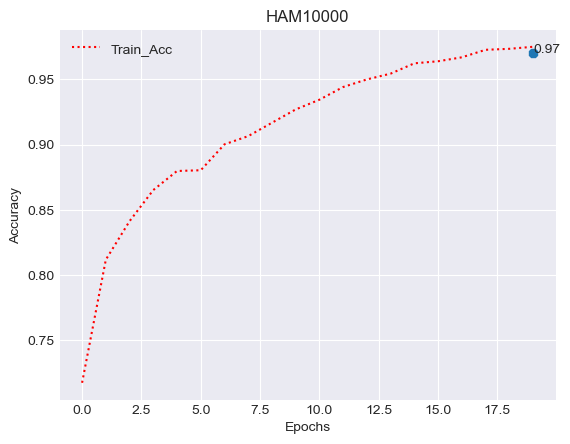

In [10]:
show.train(opt='Acc',write=True,custom_path='./tmp',img_title=img_title,suf=suf)

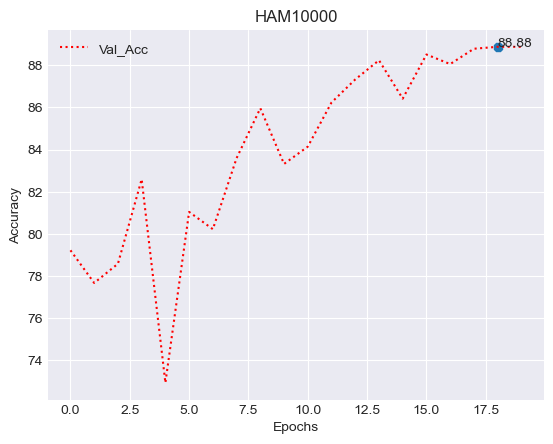

In [11]:
show.val(write=True,custom_path='./tmp',img_title=img_title,suf=suf)

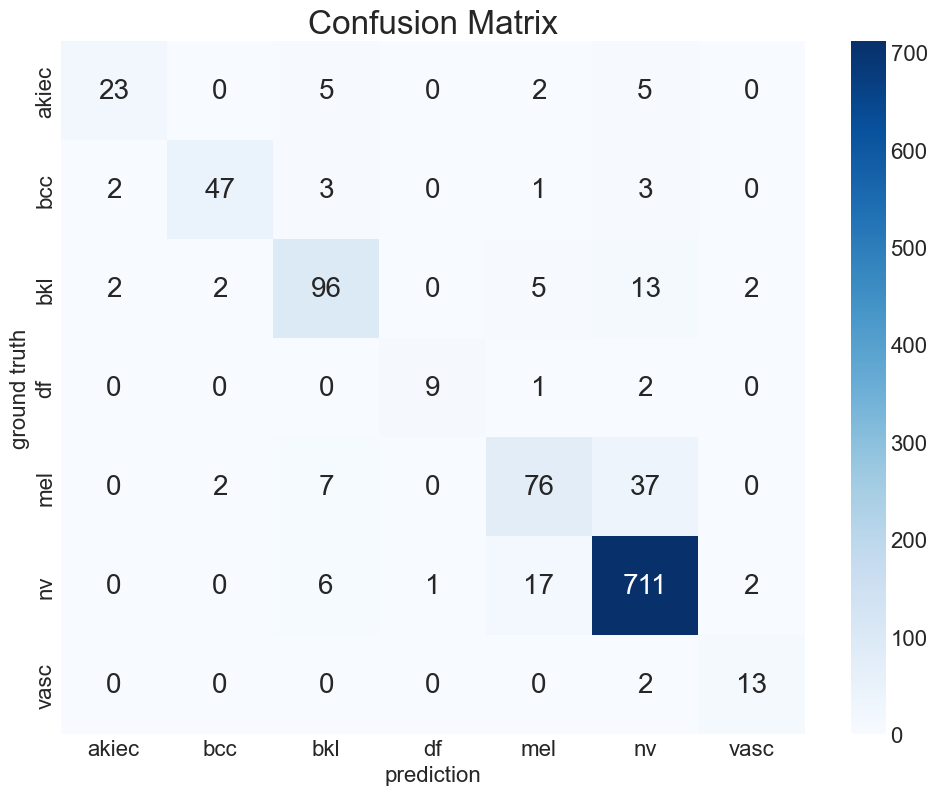

In [12]:
confusion_matrix(val_evl_result,n_classes,cla_dict,kn="val",img_title=img_title,suf=suf)